#CodeNation - Descubra as melhores notas de matemática do ENEM 2016

Olá cientista, tudo bem com você? Esse desafio foi proposto pela **CodeNation** e para você ser aceito aos treinamentos, devia obter ao menos **90% de acerto**.

Aqui vou mostrar um guia de como alcancei facilmente **93%** passo a passo.

Caso queira as informações sobre o desafio e os arquivos, basta dar uma olhada no meu repositório do git [CodeNation-Data-Science-2020](https://github.com/lpcaldeira/codenation-data-science)

- Este tutorial foi feito utilizando o Google Colab
- Baixe os arquivos no repositório citado acima e faça upload do **train.csv** e **test.csv** no menu lateral a esquerda em Files > Upload

Não esqueça de acionar a GPU em Runtime > change runtime type > Hardware accelerator > GPU > Save

#Visão geral sobre os dados

Importando as libs que serão utilizadas

In [1]:
import numpy as np
import pandas as pd

Configurações do pandas pra exibirem todas as linhas e colunas dos itens solicitados

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Importando os arquivos de treino e teste

In [3]:
df_train = pd.read_csv('train.csv', sep="," , encoding="UTF8" )
df_test = pd.read_csv('test.csv', sep="," , encoding="UTF8" )

Visualizando as colunas que estão no arquivo de testes

In [4]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

Identificando quais campos tem mais correlação com o nosso target/NU_NOTA_MT

In [5]:
# Quanto mais próximo a 1, maior a correlação
df_train.corr()['NU_NOTA_MT'].dropna().sort_values(ascending=False)

NU_NOTA_MT                     1.000000
NU_NOTA_CN                     0.584941
NU_NOTA_CH                     0.529594
NU_NOTA_LC                     0.494695
NU_NOTA_REDACAO                0.379376
TP_DEPENDENCIA_ADM_ESC         0.373233
NU_NOTA_COMP3                  0.350307
NU_NOTA_COMP5                  0.343337
NU_NOTA_COMP4                  0.342282
NU_NOTA_COMP2                  0.335638
NU_NOTA_COMP1                  0.299402
CO_MUNICIPIO_NASCIMENTO        0.113416
CO_UF_NASCIMENTO               0.112236
CO_MUNICIPIO_PROVA             0.109433
CO_MUNICIPIO_RESIDENCIA        0.108850
CO_UF_PROVA                    0.108251
CO_UF_RESIDENCIA               0.107493
CO_MUNICIPIO_ESC               0.102517
CO_ESCOLA                      0.102072
CO_UF_ESC                      0.100935
CO_UF_ENTIDADE_CERTIFICACAO    0.086797
TP_ESCOLA                      0.069304
IN_DEFICIT_ATENCAO             0.060628
IN_SEM_RECURSO                 0.034406
Q035                           0.031685


Criando as colunas que serão utilizadas no modelo

In [6]:
colunas = [
    'CO_UF_RESIDENCIA',
    'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'TP_SEXO',
    'TP_COR_RACA',
    'TP_NACIONALIDADE',
    'TP_ST_CONCLUSAO',
    'TP_ANO_CONCLUIU',
    'TP_ESCOLA',
    'TP_ENSINO',
    'IN_TREINEIRO',
    'TP_DEPENDENCIA_ADM_ESC',
    'IN_BAIXA_VISAO',
    'IN_CEGUEIRA',
    'IN_SURDEZ',
    'IN_DISLEXIA',
    'IN_DISCALCULIA',
    'IN_SABATISTA',
    'IN_GESTANTE',
    'IN_IDOSO',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_LC',
    'CO_PROVA_CN',
    'CO_PROVA_CH',
    'CO_PROVA_LC',
    'CO_PROVA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'TP_LINGUA',
    'TP_STATUS_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO',
    'Q001',
    'Q002',
    'Q006',
    'Q024',
    'Q025',
    'Q026',
    'Q027',
    'Q047'
]
colunas_corr = [
    'NU_NOTA_MT',
    'CO_UF_RESIDENCIA',
    'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'TP_SEXO',
    'TP_COR_RACA',
    'TP_NACIONALIDADE',
    'TP_ST_CONCLUSAO',
    'TP_ANO_CONCLUIU',
    'TP_ESCOLA',
    'TP_ENSINO',
    'IN_TREINEIRO',
    'TP_DEPENDENCIA_ADM_ESC',
    'IN_BAIXA_VISAO',
    'IN_CEGUEIRA',
    'IN_SURDEZ',
    'IN_DISLEXIA',
    'IN_DISCALCULIA',
    'IN_SABATISTA',
    'IN_GESTANTE',
    'IN_IDOSO',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_LC',
    'CO_PROVA_CN',
    'CO_PROVA_CH',
    'CO_PROVA_LC',
    'CO_PROVA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'TP_LINGUA',
    'TP_STATUS_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO',
    'Q001',
    'Q002',
    'Q006',
    'Q024',
    'Q025',
    'Q026',
    'Q027',
    'Q047'
]

#Gráficos e correções de valores

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

Vamos usar estes campos para visualizar os gráficos, pois possuem maior correlação com o target:

> NU_NOTA_LC

> NU_NOTA_CN

> NU_NOTA_CH

Quantidade de campos NULOS de cada campo

In [8]:
df_train[colunas].isnull().sum()

CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATUS_REDACAO         3597
NU_NOTA_

Visualizando campos nulos/NaN nos datasets

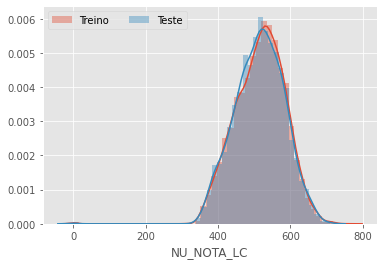

In [9]:
x0 = df_train['NU_NOTA_LC']
x1 = df_test['NU_NOTA_LC']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left');

Pelo visto, temos muitos campo nulos/NaN, então a minha opção foi substituí-los por zero

In [10]:
#Caso queira utilizar média, basta descomentar a linha abaixo
#df_train = df_train.fillna(df_train.median())
#E comentar essa
df_train = df_train.fillna(0)

# Quantidade de linhas no dataset de treino
len(df_train)

13730

 Verifica o gráfico de novo (repare agora a quantidade de valores Zero que temos no dataset de TREINO)

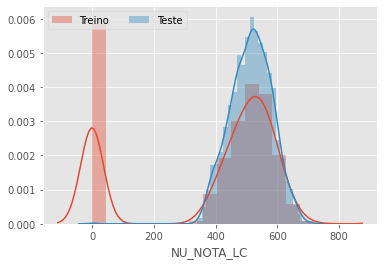

In [11]:
x0 = df_train['NU_NOTA_LC']
x1 = df_test['NU_NOTA_LC']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left');

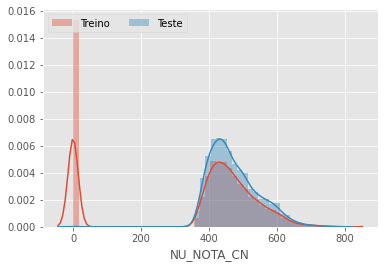

In [12]:
# Verifica outro gráfico
x0 = df_train['NU_NOTA_CN']
x1 = df_test['NU_NOTA_CN']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left');

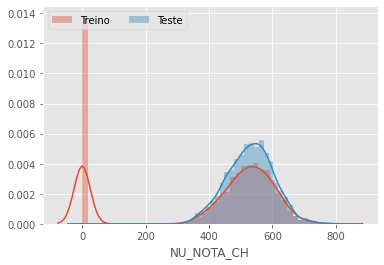

In [13]:
# Verifica outro gráfico
x0 = df_train['NU_NOTA_CH']
x1 = df_test['NU_NOTA_CH']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left');

Verificando a quantidade de nulos/NaN no dataset de Teste

In [14]:
# Verificando a quantidade de notas ‘nulls’ na base de test:
df_test.isnull().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 3096
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    3096
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                1134
NU_NOTA_CH                1134
NU_NOTA_LC                1199
TP_LINGUA                    0
TP_STATU

Agora, repetimos a mesma substituição aplicada no dataset de Treino ao dataset de Teste

In [15]:
#Caso queira utilizar média, basta descomentar a linha abaixo
#df_test = df_test.fillna(df_test.median())
#E comentar essa
df_test = df_test.fillna(0)

# Quantidade de linhas no dataset de treino
len(df_test)

4576

Vamos verificar novamente como ficaram os gráficos, percebendo que a coluna Azul (que representa o dataset de testes), também cresceu em valores 0 e diminuiu em nulos/NaN

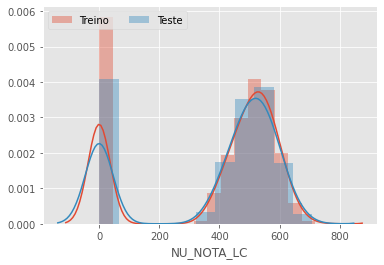

In [16]:
# Verifica outro gráfico
x0 = df_train['NU_NOTA_LC']
x1 = df_test['NU_NOTA_LC']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left');

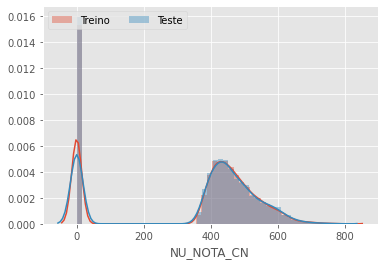

In [17]:
# Verifica o gráfico de novo
x0 = df_train['NU_NOTA_CN']
x1 = df_test['NU_NOTA_CN']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left');

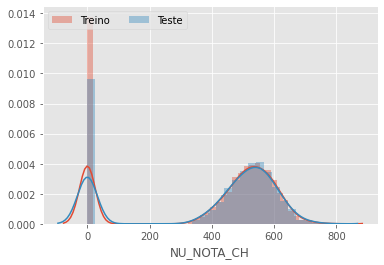

In [18]:
# Verifica outro gráfico
x0 = df_train['NU_NOTA_CH']
x1 = df_test['NU_NOTA_CH']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left');

#Separando e tratando os dados

Precisamos normalizar os dados tratando/transformando campos do tipo **OBJECT** em **FLOAT**

Primeiro, os encontramos nos 2 datasets

In [19]:
train_colunas_do_tipo_objeto = df_train.select_dtypes(include=[object]).columns
test_colunas_do_tipo_objeto = df_test.select_dtypes(include=[object]).columns

Agora, separamos os valores de cada dataset e os campos que vamos utilizar

In [20]:
# y_train fica com os valores das notas de matemática do Treino
y_train = df_train['NU_NOTA_MT']
# x_train pega todos os valores que o dataset de Teste possui
x_train = df_train[colunas]
# x_test tem todos os campos, menos a Inscrição(NU_INSCRICAO)
x_test = df_test[colunas]

Depois, podemos usar, por exemplo, o LabelEncoder para tratar cada campo do tipo objeto

In [21]:
from sklearn.preprocessing import LabelEncoder

y_train_encoder = LabelEncoder().fit_transform(y_train)

for coluna in train_colunas_do_tipo_objeto:
  if coluna in colunas and coluna != 'NU_INSCRICAO':
    x_train[coluna] = LabelEncoder().fit_transform(x_train[coluna].astype(str))

for coluna in test_colunas_do_tipo_objeto:
  if coluna in colunas and coluna != 'NU_INSCRICAO':
    x_test[coluna] = LabelEncoder().fit_transform(x_test[coluna].astype(str))

<ipython-input-21-93b2b3a7eb49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[coluna] = LabelEncoder().fit_transform(x_train[coluna].astype(str))
<ipython-input-21-93b2b3a7eb49>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[coluna] = LabelEncoder().fit_transform(x_test[coluna].astype(str))


Importamos os scalers e aplicamos nos dados para aumentar a velocidade de processamento.

Neste exemplo, apenas apliquei o Standard mas deixei o Robust junto, para caso você queira fazer alguns testes extras.

In [22]:
from sklearn.preprocessing import RobustScaler, StandardScaler
sc = StandardScaler()
rb = StandardScaler()
x_train_scaler = sc.fit_transform(x_train)  
x_test_scaler = sc.transform(x_test)

#Criando os modelos de regressões

Estou utilizando aqui o conceito de Pipeline com RandomizedSearchCV (você pode aplicar o GridSearchCV se quiser) para realizar vários testes de regressão e identificar os melhores parâmetros para o meu modelo alcançar ou chegar o mais próximo de 100%

##O primeiro a ser testado será o AdaBoost

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Instanciamos o Regressor
ada = AdaBoostRegressor()
# Setamos o Scaler que criamos anteriormente e o Regressor
clf = Pipeline([('scaler', sc), ('ada', ada)])

# Informamos os parâmetros e variações do Regressor que queremos que o RandomizedSearchCV aplique para nós
random_grid = {
    'ada__base_estimator': [DecisionTreeRegressor(max_depth=8), DecisionTreeRegressor(max_depth=3)],
    'ada__random_state': [0, 42],
    'ada__loss': ['linear','square','exponential'],
    'ada__n_estimators': [10, 20, 50, 100, 200]
}

# Informamos mais alguns parâmetros, agora referentes apenas ao RandomizeSearchCV
search = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, 
                            n_iter = 20, cv = 5, verbose = 10, n_jobs = -1)

# Aqui efetivamente roda o processo usando o dataset de Treino para treinar o modelo
results = search.fit(x_train, y_train)

# Aqui mostrará os melhores parâmetros juntamente com o percentual de acerto.
# No teste que fiz, o percentual ficou em 99.99963%
results.best_score_, results.best_params_, results.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.2min finished


(0.9232058508027757,
 {'ada__random_state': 42,
  'ada__n_estimators': 10,
  'ada__loss': 'exponential',
  'ada__base_estimator': DecisionTreeRegressor(max_depth=8)},
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('ada',
                  AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=8),
                                    loss='exponential', n_estimators=10,
                                    random_state=42))]))

0.9235217474934994 %

Regressor com parâmetros:

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                         criterion='mse',
                                                                         max_depth=8,
                                                                         max_features=None,
                                                                         max_leaf_nodes=None,
                                                                         min_impurity_decrease=0.0,
                                                                         min_impurity_split=None,
                                                                         min_samples_leaf=1,
                                                                         min_samples_split=2,
                                                                         min_weight_fraction_leaf=0.0,
                                                                         presort='deprecated',
                                                                         random_state=None,
                                                                         splitter='best'),
                                    learning_rate=1.0, loss='exponential',
                                    n_estimators=10, random_state=0)

Então, agora que tenho os parâmetros que já me deram 92% de acerto, vou utilizá-los no dataset de Teste

In [24]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                         criterion='mse',
                                                                         max_depth=8,
                                                                         max_features=None,
                                                                         max_leaf_nodes=None,
                                                                         min_impurity_decrease=0.0,
                                                                         min_impurity_split=None,
                                                                         min_samples_leaf=1,
                                                                         min_samples_split=2,
                                                                         min_weight_fraction_leaf=0.0,
                                                                         presort='deprecated',
                                                                         random_state=None,
                                                                         splitter='best'),
                                    learning_rate=1.0, loss='exponential',
                                    n_estimators=10, random_state=0)

# Treinando o nosso modelo com o scaler e encoder que fizemos lá em cima
ada.fit(x_train_scaler, y_train_encoder)
# Realizando a predição das notas com o dataset de Teste
y_pred_test = ada.predict(x_test_scaler)
# Exportando o arquivo com as notas geradas
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = df_test.NU_INSCRICAO
answer['NU_NOTA_MT'] = y_pred_test
answer.to_csv('answer_ada.csv', index=False)

In [25]:
# Teste auxiliar para identificar a acurrácia do modelo usando cross_validation.
# Quanto mais perto de 1.0, melhor
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ada, x_test_scaler, y_pred_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.97582539 0.97910108 0.97784262 0.97826916 0.97617906]
Accuracy: 0.98 (+/- 0.00)


##O segundo a ser testado será o DecisionTree

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
clf = Pipeline([('scaler', sc), ('dt', dt)])

random_grid = {
    'dt__criterion': ['mse', 'friedman_mse', 'mae'],
    'dt__splitter': ['best', 'random'],
    'dt__max_depth': [None, 5, 8, 20],
    'dt__min_samples_split': [0, 2, 5],
    'dt__min_samples_leaf': [0, 1, 5],
    'dt__min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'dt__max_features': [0, None, 5, 10, 'auto', 'sqrt', 'log2'],
    'dt__random_state': [0, None, 5, 42]
}

search = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, 
                            n_iter = 200, cv = 5, verbose = 10, n_jobs = -1)

results = search.fit(x_train, y_train)

results.best_score_, results.best_params_, results.best_estimator_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1653s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4879s.) Setting batch_size=1.
[Parallel(n_jo

(0.9072323784363631,
 {'dt__splitter': 'best',
  'dt__random_state': 5,
  'dt__min_weight_fraction_leaf': 0.0,
  'dt__min_samples_split': 5,
  'dt__min_samples_leaf': 5,
  'dt__max_features': 10,
  'dt__max_depth': 5,
  'dt__criterion': 'mae'},
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('dt',
                  DecisionTreeRegressor(criterion='mae', max_depth=5,
                                        max_features=10, min_samples_leaf=5,
                                        min_samples_split=5, random_state=5))]))

0.9163452188462285 %

Regressor com os parâmetros:

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                        max_depth=8, max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best')

In [27]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                        max_depth=8, max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best')
# Treinando o nosso modelo através do fit:
dt.fit(x_train_scaler, y_train_encoder)
# Realizando a predição das notas da nossa base test:
y_pred_test = dt.predict(x_test_scaler)
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = df_test.NU_INSCRICAO
answer['NU_NOTA_MT'] = y_pred_test
answer.to_csv('answer_dt.csv', index=False)

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, x_test_scaler, y_pred_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.94727513 0.9554578  0.96070499 0.92811386 0.93995893]
Accuracy: 0.95 (+/- 0.02)


##O terceiro a ser testado é o RandomForest

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
clf = Pipeline([('scaler', sc), ('rf', rf)])

random_grid = {
    'rf__criterion': ['mse', 'friedman_mse', 'mae'],
    'rf__n_estimators': [10, 100, 200, 300],
    'rf__max_depth': [None, 5, 8, 20],
    'rf__min_samples_split': [0, 2, 5],
    'rf__min_samples_leaf': [0, 1, 5, 10],
    'rf__max_features': [0, 'auto', 'sqrt', 'log2'],
    'rf__n_jobs': [-1],
    'rf__verbose': [10],
    'rf__random_state': [0, None, 5, 42]
}

search = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, 
                            n_iter = 20, cv = 5, verbose = 10, n_jobs = -1)

results = search.fit(x_train, y_train)

results.best_score_, results.best_params_, results.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1676s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.3835s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 29.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s


building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s


building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100building tree 19 of 100

building tree 20 of 100
building tree 21 of 100
building tree 22 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s


building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.7s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.1s


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s


building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.4s


building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.0s


building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100building tree 80 of 100

building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.9s


building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    5.5s


building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished


(0.9253931841189722,
 {'rf__verbose': 10,
  'rf__random_state': 0,
  'rf__n_jobs': -1,
  'rf__n_estimators': 100,
  'rf__min_samples_split': 2,
  'rf__min_samples_leaf': 1,
  'rf__max_features': 'auto',
  'rf__max_depth': 8,
  'rf__criterion': 'mse'},
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('rf',
                  RandomForestRegressor(max_depth=8, n_jobs=-1, random_state=0,
                                        verbose=10))]))

0.9254360637203654 %

Regressor com os parâmetros:

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='friedman_mse', max_depth=20,
                                        max_features='auto', max_leaf_nodes=None,
                                        max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=5, min_samples_split=5,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=-1,
                                        oob_score=False, random_state=5,
                                        verbose=10, warm_start=False)

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='friedman_mse', max_depth=20,
                                        max_features='auto', max_leaf_nodes=None,
                                        max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=5, min_samples_split=5,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=-1,
                                        oob_score=False, random_state=5,
                                        verbose=10, warm_start=False)
# Treinando o nosso modelo através do fit:
rf.fit(x_train_scaler, y_train_encoder)
# Realizando a predição das notas da nossa base test:
y_pred_test = rf.predict(x_test_scaler)
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = df_test.NU_INSCRICAO
answer['NU_NOTA_MT'] = y_pred_test
answer.to_csv('answer_rf.csv', index=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 200building tree 2 of 200building tree 3 of 200

building tree 4 of 200

building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.8s


building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s


building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.6s


building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s


building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s


building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.5s


building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.4s


building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    7.6s


building tree 81 of 200
building tree 82 of 200
building tree 83 of 200
building tree 84 of 200
building tree 85 of 200
building tree 86 of 200
building tree 87 of 200
building tree 88 of 200
building tree 89 of 200
building tree 90 of 200
building tree 91 of 200
building tree 92 of 200
building tree 93 of 200
building tree 94 of 200


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    8.8s


building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   10.2s


building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   11.9s


building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   13.5s


building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.0s


building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   16.9s


building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200building tree 187 of 200

building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.7s


building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   19.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, x_test_scaler, y_pred_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1072s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0459s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 2

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0562s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0667s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0648s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    4.5s


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[0.98478279 0.98734295 0.98512844 0.98790398 0.98457088]
Accuracy: 0.99 (+/- 0.00)


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    

#Caso você queira aplicar mais alguns algoritmos, segue aqui algumas recomendações

In [32]:
# Outra opção de Pipeline
from sklearn.model_selection import GridSearchCV
# Outras opções de Regressores
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Outra opção de scaler
# Primeiro instala
!pip install category_encoders
# Depois o utiliza da mesma forma que usa o StandardScaler
import category_encoders as ce
onehotencoder = ce.OneHotEncoder()
x_train_onehotencoder = onehotencoder.fit_transform(x_train)
x_test_onehotencoder = onehotencoder.fit_transform(x_test)

#Script que não permite que o Google Colab desconecte. Assim, você não perde suas execuções que demoram mais de 30 minutos.

Basta abrir as opções de desenvolvedor (F12 ou ctrl + shift + i), colar o código abaixo na aba Console e dar Enter.

> function ConnectButton(){
    const arraydocolab = document.querySelectorAll('.notebook-content .cell.code .cell-gutter paper-icon-button')
    arraydocolab[arraydocolab.length - 1].click()
    console.log('==== Reconecta a cada 20 minutos ====')
}
var intervaldocolab = setInterval(ConnectButton,1200000);
// se quiser remover isso, basta digitar no console: clearInterval(intervaldocolab)



In [33]:
# Mantenha essa célula aqui para garantir o funcionamento do script